### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 합성곱 신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape
# 결과에 1이 들어간 이유 : 이미지 값을 넣어야하기 때문

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [8]:
model = keras.Sequential()

# 필터32개, input_shape=(28,28,1): 우리가 만든값 그대로 넣겠다는 뜻
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))  # 2개씩 줄이면 14x14 특성맵 32개 만들어짐
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))  # 14x14가 64개 만들어짐
model.add(keras.layers.MaxPooling2D(2))  # 7x7 특성맵 64개

In [9]:
model.add(keras.layers.Flatten())  # 다시 푼다/ 7x7x64 +64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
keras.utils.plot_model(model)
# 층의 구성을 그림으로 표현해주는건데 나중에 패키지 설치하고 한번 해봐~
# 잘 나오진않음

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# save_best_only=True 해줘야 가장 좋은 모델 저장됨
# 어떤게 저장됐는지 보고싶으면 verbose=1 로 확인
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.8094
Epoch 1: val_loss improved from inf to 0.34082, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.5369 - accuracy: 0.8094 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8730
Epoch 2: val_loss improved from 0.34082 to 0.27730, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3492 - accuracy: 0.8729 - val_loss: 0.2773 - val_accuracy: 0.8969
Epoch 3/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8930
Epoch 3: val_loss improved from 0.27730 to 0.25771, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2989 - accuracy: 0.8930 - val_loss: 0.2577 - val_accuracy: 0.9032
Epoch 4/20
1499/1500 [====

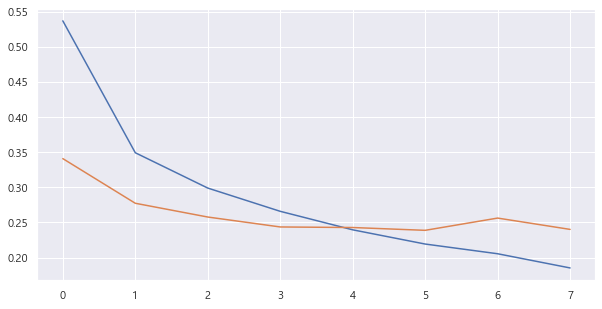

In [13]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [14]:
early_stopping_cb.stopped_epoch

7

In [15]:
model.evaluate(val_scaled, val_target)
# 정확도 꽤 높게 나왔음

375/375 [==============================] - 3s 8ms/step - loss: 0.2388 - accuracy: 0.9128


[0.23877625167369843, 0.9128333330154419]

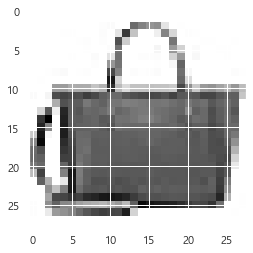

In [16]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap='gray_r')  # 이미지를 보여준다
plt.show()

In [17]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 121ms/step


array([[2.07396881e-14, 1.74111325e-20, 3.46169792e-17, 1.07939145e-14,
        3.19279081e-13, 5.59677969e-14, 2.34158314e-13, 4.05584024e-15,
        1.00000000e+00, 8.51581726e-16]], dtype=float32)

In [18]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels
# 8은 가방이니까 잘 예측했다

1/1 [==============================] - 0s 22ms/step


array([8], dtype=int64)

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [20]:
print(classes[np.argmax(result)])

가방
